In [23]:
from nltk.stem import (PorterStemmer, LancasterStemmer)
from nltk.stem.snowball import SnowballStemmer # This is "Porter 2" and is considered the optimal stemmer.
from nltk import WordNetLemmatizer,word_tokenize
from nltk.corpus import reuters,stopwords
import string

In [4]:
st = PorterStemmer()
words = ['is', 'are', 'bought', 'buys', 'giving', 'jumps', 'jumped', 'birds', 'do', 'does', 'did', 'doing']
for word in words:
    print(word, st.stem(word))

is is
are are
bought bought
buys buy
giving give
jumps jump
jumped jump
birds bird
do do
does doe
did did
doing do


The difference is that the result of stemming may not be an actual word, but lemmatization returns the root word. NLTK supports both.
You can also try the Lancaster or Snowball stemmers. The Snowball stemmer supports numerous languages: Arabic, Danish, Dutch, English, Finnish, French, German, Hungarian, Italian, Norwegian, Portuguese, Romanian, Russian, Spanish and Swedish.

In [7]:
wnl = WordNetLemmatizer()
for word in words:
    print(word, wnl.lemmatize(word))

is is
are are
bought bought
buys buy
giving giving
jumps jump
jumped jumped
birds bird
do do
does doe
did did
doing doing


In [21]:
porter = PorterStemmer()
lancaster = LancasterStemmer()
snowball = SnowballStemmer("english")

print('Porter: ',porter.stem('Re-testing'),"\n",'Lancaster: ',lancaster.stem('Re-testing'),"\n",'Snowball: ',snowball.stem('Re-testing'))

Porter:  re-test 
 Lancaster:  re-testing 
 Snowball:  re-test


In [25]:
sentence = "So, we'll go no more a-roving. So late into the night, Though the heart be still as loving, And the moon be still as bright."

# This uses the 3-argument version of str.maketrans with arguments (x, y, z) where 'x' and 'y' must be equal-length strings and characters in 'x' are replaced by characters in 'y'. 'z' is a string (string.punctuation here) where each character in the string is mapped to None
translator = str.maketrans('', '', string.punctuation)

tokens = word_tokenize(sentence.translate(translator))
tokens

['So',
 'well',
 'go',
 'no',
 'more',
 'aroving',
 'So',
 'late',
 'into',
 'the',
 'night',
 'Though',
 'the',
 'heart',
 'be',
 'still',
 'as',
 'loving',
 'And',
 'the',
 'moon',
 'be',
 'still',
 'as',
 'bright']

In [26]:
for stemmer in [porter, lancaster, snowball]:
    print([stemmer.stem(t) for t in tokens],"\n")

['So', 'well', 'go', 'no', 'more', 'arov', 'So', 'late', 'into', 'the', 'night', 'though', 'the', 'heart', 'be', 'still', 'as', 'love', 'and', 'the', 'moon', 'be', 'still', 'as', 'bright'] 

['so', 'wel', 'go', 'no', 'mor', 'arov', 'so', 'lat', 'into', 'the', 'night', 'though', 'the', 'heart', 'be', 'stil', 'as', 'lov', 'and', 'the', 'moon', 'be', 'stil', 'as', 'bright'] 

['so', 'well', 'go', 'no', 'more', 'arov', 'so', 'late', 'into', 'the', 'night', 'though', 'the', 'heart', 'be', 'still', 'as', 'love', 'and', 'the', 'moon', 'be', 'still', 'as', 'bright'] 



In [35]:
wnl = WordNetLemmatizer()
print([wnl.lemmatize(i) for i in tokens])

['So', 'well', 'go', 'no', 'more', 'aroving', 'So', 'late', 'into', 'the', 'night', 'Though', 'the', 'heart', 'be', 'still', 'a', 'loving', 'And', 'the', 'moon', 'be', 'still', 'a', 'bright']


In [39]:
wnl.lemmatize('brightening'), wnl.lemmatize('boxes')

('brightening', 'box')

In [38]:
# As we saw above, sometimes, if we try to lemmatize a word, it will end up with the same word. This is because the default part of speech is nouns.
wnl.lemmatize('brightening', pos='v')

'brighten'

---
### Let's look at Reuter's corpus
 a large collection of Reuters News stories

In [9]:
reuters.readme().replace('\n', ' ')

'       The Reuters-21578 benchmark corpus, ApteMod version  This is a publically available version of the well-known Reuters-21578 "ApteMod" corpus for text categorization.  It has been used in publications like these:   * Yiming Yang and X. Liu. "A re-examination of text categorization    methods".  1999.  Proceedings of 22nd Annual International SIGIR.    http://citeseer.nj.nec.com/yang99reexamination.html   * Thorsten Joachims. "Text categorization with support vector    machines: learning with many relevant features".  1998. Proceedings    of ECML-98, 10th European Conference on Machine Learning.    http://citeseer.nj.nec.com/joachims98text.html  ApteMod is a collection of 10,788 documents from the Reuters financial newswire service, partitioned into a training set with 7769 documents and a test set with 3019 documents.  The total size of the corpus is about 43 MB.  It is also available for download from http://kdd.ics.uci.edu/databases/reuters21578/reuters21578.html , which inclu

In [10]:
reuters.fileids()

['test/14826',
 'test/14828',
 'test/14829',
 'test/14832',
 'test/14833',
 'test/14839',
 'test/14840',
 'test/14841',
 'test/14842',
 'test/14843',
 'test/14844',
 'test/14849',
 'test/14852',
 'test/14854',
 'test/14858',
 'test/14859',
 'test/14860',
 'test/14861',
 'test/14862',
 'test/14863',
 'test/14865',
 'test/14867',
 'test/14872',
 'test/14873',
 'test/14875',
 'test/14876',
 'test/14877',
 'test/14881',
 'test/14882',
 'test/14885',
 'test/14886',
 'test/14888',
 'test/14890',
 'test/14891',
 'test/14892',
 'test/14899',
 'test/14900',
 'test/14903',
 'test/14904',
 'test/14907',
 'test/14909',
 'test/14911',
 'test/14912',
 'test/14913',
 'test/14918',
 'test/14919',
 'test/14921',
 'test/14922',
 'test/14923',
 'test/14926',
 'test/14928',
 'test/14930',
 'test/14931',
 'test/14932',
 'test/14933',
 'test/14934',
 'test/14941',
 'test/14943',
 'test/14949',
 'test/14951',
 'test/14954',
 'test/14957',
 'test/14958',
 'test/14959',
 'test/14960',
 'test/14962',
 'test/149

In [46]:
len(reuters.fileids())

10788

In [47]:
reuters.categories()

['acq',
 'alum',
 'barley',
 'bop',
 'carcass',
 'castor-oil',
 'cocoa',
 'coconut',
 'coconut-oil',
 'coffee',
 'copper',
 'copra-cake',
 'corn',
 'cotton',
 'cotton-oil',
 'cpi',
 'cpu',
 'crude',
 'dfl',
 'dlr',
 'dmk',
 'earn',
 'fuel',
 'gas',
 'gnp',
 'gold',
 'grain',
 'groundnut',
 'groundnut-oil',
 'heat',
 'hog',
 'housing',
 'income',
 'instal-debt',
 'interest',
 'ipi',
 'iron-steel',
 'jet',
 'jobs',
 'l-cattle',
 'lead',
 'lei',
 'lin-oil',
 'livestock',
 'lumber',
 'meal-feed',
 'money-fx',
 'money-supply',
 'naphtha',
 'nat-gas',
 'nickel',
 'nkr',
 'nzdlr',
 'oat',
 'oilseed',
 'orange',
 'palladium',
 'palm-oil',
 'palmkernel',
 'pet-chem',
 'platinum',
 'potato',
 'propane',
 'rand',
 'rape-oil',
 'rapeseed',
 'reserves',
 'retail',
 'rice',
 'rubber',
 'rye',
 'ship',
 'silver',
 'sorghum',
 'soy-meal',
 'soy-oil',
 'soybean',
 'strategic-metal',
 'sugar',
 'sun-meal',
 'sun-oil',
 'sunseed',
 'tea',
 'tin',
 'trade',
 'veg-oil',
 'wheat',
 'wpi',
 'yen',
 'zinc']

In [56]:
len(reuters.sents('test/14826')),reuters.sents('test/14826')

(31,
 [['ASIAN', 'EXPORTERS', 'FEAR', 'DAMAGE', 'FROM', 'U', '.', 'S', '.-', 'JAPAN', 'RIFT', 'Mounting', 'trade', 'friction', 'between', 'the', 'U', '.', 'S', '.', 'And', 'Japan', 'has', 'raised', 'fears', 'among', 'many', 'of', 'Asia', "'", 's', 'exporting', 'nations', 'that', 'the', 'row', 'could', 'inflict', 'far', '-', 'reaching', 'economic', 'damage', ',', 'businessmen', 'and', 'officials', 'said', '.'], ['They', 'told', 'Reuter', 'correspondents', 'in', 'Asian', 'capitals', 'a', 'U', '.', 'S', '.', 'Move', 'against', 'Japan', 'might', 'boost', 'protectionist', 'sentiment', 'in', 'the', 'U', '.', 'S', '.', 'And', 'lead', 'to', 'curbs', 'on', 'American', 'imports', 'of', 'their', 'products', '.'], ...])

In [59]:
gold_words = reuters.words(categories='gold')
len(gold_words)

23374

In [66]:
gold_words_sw = [w.lower() for w in gold_words if w.lower() not in stopwords.words('english')]
gold_words_sw[:15]

['western',
 'mining',
 'open',
 'new',
 'gold',
 'mine',
 'australia',
 'western',
 'mining',
 'corp',
 'holdings',
 'ltd',
 '&',
 'lt',
 ';']

In [67]:
gold_words_sw_punc = [w for w in gold_words_sw if w not in string.punctuation]
gold_words_sw_punc[:15]

['western',
 'mining',
 'open',
 'new',
 'gold',
 'mine',
 'australia',
 'western',
 'mining',
 'corp',
 'holdings',
 'ltd',
 'lt',
 'wmng',
 'wmc']

In [69]:
from nltk import bigrams

bi_gold_words_condensed = list(bigrams(gold_words_sw_punc))
bi_gold_words_condensed[:10]

[('western', 'mining'),
 ('mining', 'open'),
 ('open', 'new'),
 ('new', 'gold'),
 ('gold', 'mine'),
 ('mine', 'australia'),
 ('australia', 'western'),
 ('western', 'mining'),
 ('mining', 'corp'),
 ('corp', 'holdings')]

In [72]:
from nltk import FreqDist

bi_fdist = FreqDist(bi_gold_words_condensed)

for word, frequency in bi_fdist.most_common(5):
    print(word, frequency)

('ounces', 'gold') 60
('per', 'ton') 53
('ounce', 'gold') 42
('company', 'said') 41
('000', 'ounces') 39


In [93]:
import matplotlib.pyplot as plt
from matplotlib import style

style.use('fivethirtyeight')

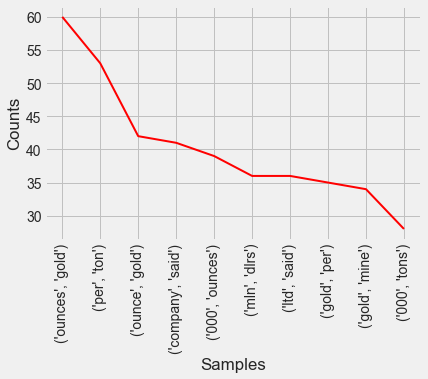

In [96]:
bi_fdist.plot(10, color='red', cumulative=False)